<a href="https://colab.research.google.com/github/anandopt/Timeseries/blob/master/JetRail_traffic_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# Mounting Google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
!pwd

/content


In [0]:
# Python code starts from here.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from pandas import Series

train = pd.read_csv("/content/drive/My Drive/MLDL/JetRail_traffic_forecast/Train_SU63ISt.csv")
test = pd.read_csv("/content/drive/My Drive/MLDL/JetRail_traffic_forecast/Test_0qrQsBZ.csv")

In [0]:
train_1=train.copy()
test_1=test.copy()

In [123]:
print(train.columns)
print(test.columns)
print(train.dtypes)

Index(['ID', 'Datetime', 'Count'], dtype='object')
Index(['ID', 'Datetime'], dtype='object')
ID           int64
Datetime    object
Count        int64
dtype: object


In [124]:
train.head(10)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [125]:
# Converting Datetime column into datetime format
train_1["Datetime"] = pd.to_datetime(train_1.Datetime, format='%d-%m-%Y %H:%M')
train_1.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [0]:
train_1["Datetime"] = pd.to_datetime(train_1.Datetime, format='%d-%m-%Y %H:%M')
train["Datetime"] = pd.to_datetime(train_1.Datetime, format='%d-%m-%Y %H:%M')
test["Datetime"] = pd.to_datetime(train_1.Datetime, format='%d-%m-%Y %H:%M')
test_1["Datetime"] = pd.to_datetime(train_1.Datetime, format='%d-%m-%Y %H:%M')

In [127]:
for i in (train, test, train_1, test_1):
  i['Year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['Day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour
 
i.head()

,ID,Datetime,Year,month,Day,Hour
0,18288,2012-08-25 00:00:00,2012,8,25,0
1,18289,2012-08-25 01:00:00,2012,8,25,1
2,18290,2012-08-25 02:00:00,2012,8,25,2
3,18291,2012-08-25 03:00:00,2012,8,25,3
4,18292,2012-08-25 04:00:00,2012,8,25,4


In [128]:
# fetching dates to find weekends
train['Weekdays'] = train.Datetime.dt.dayofweek
train['Weekdays'].head()


0    5
1    5
2    5
3    5
4    5
Name: Weekdays, dtype: int64

In [129]:
def DateClassifier(row):
  if row.dayofweek ==5 or row.dayofweek == 6:
    return 1
  else:
    return 0
# end def

train['Weekend'] = train.Datetime.apply(DateClassifier)
train['Weekend'].tail(10)

18278    0
18279    0
18280    0
18281    0
18282    0
18283    0
18284    0
18285    0
18286    0
18287    0
Name: Weekend, dtype: int64

In [130]:
train.head(10)

,ID,Datetime,Count,Year,month,Day,Hour,Weekdays,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
5,5,2012-08-25 05:00:00,2,2012,8,25,5,5,1
6,6,2012-08-25 06:00:00,2,2012,8,25,6,5,1
7,7,2012-08-25 07:00:00,2,2012,8,25,7,5,1
8,8,2012-08-25 08:00:00,6,2012,8,25,8,5,1
9,9,2012-08-25 09:00:00,2,2012,8,25,9,5,1


In [0]:
train.index=train['Datetime']

In [0]:
train.drop(['ID', 'Datetime'], 1, inplace=True)


In [133]:
train.head()

,Count,Year,month,Day,Hour,Weekdays,Weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [134]:
ts = train.Count
ts.head()

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
Name: Count, dtype: int64

TypeError: ignored

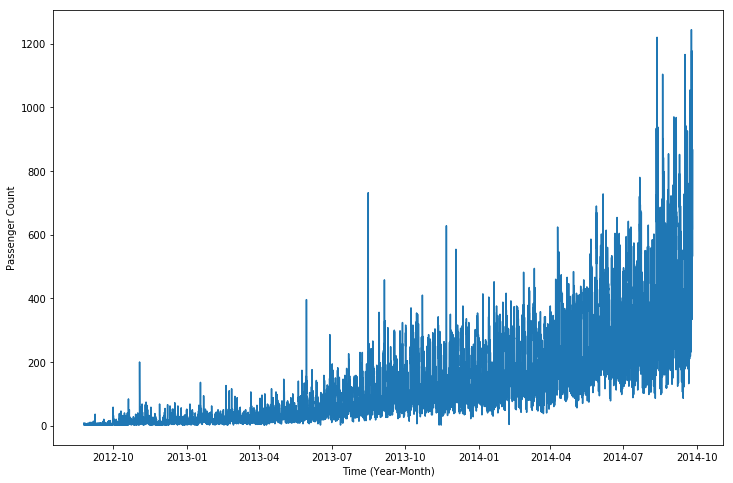

In [135]:
# Plotting time series
plt.figure(figsize=(12,8))
plt.plot(ts, label="Passenger Count")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Passenger Count")
plt.title("Passenger Count")
plt.legend(loc='best')

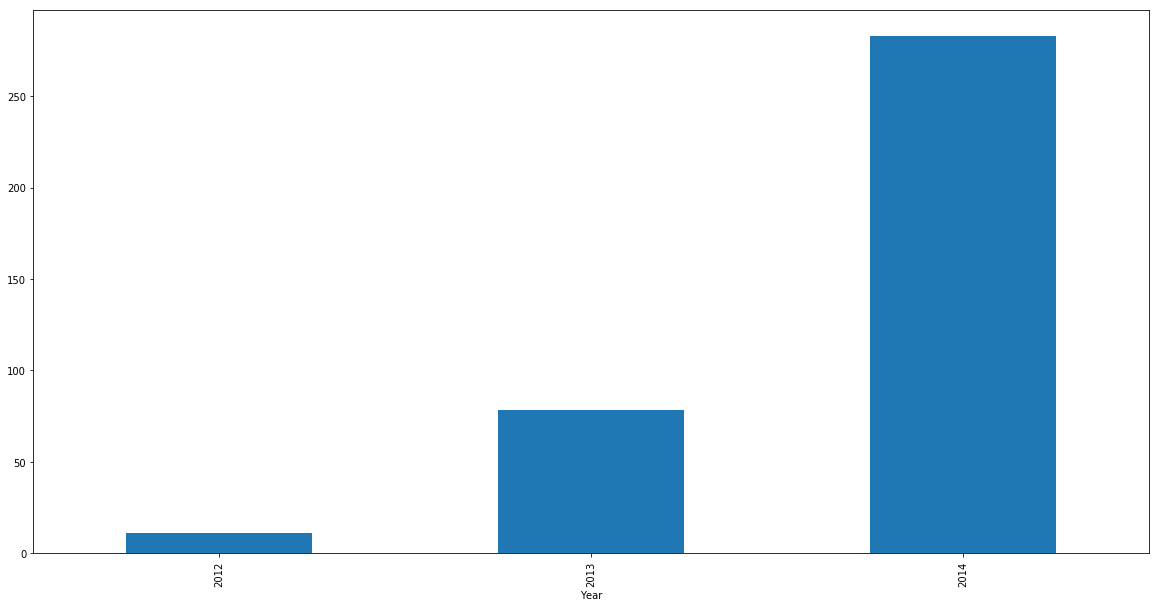

In [136]:
# Yearly bar plot
train.groupby('Year').Count.mean().plot.bar()

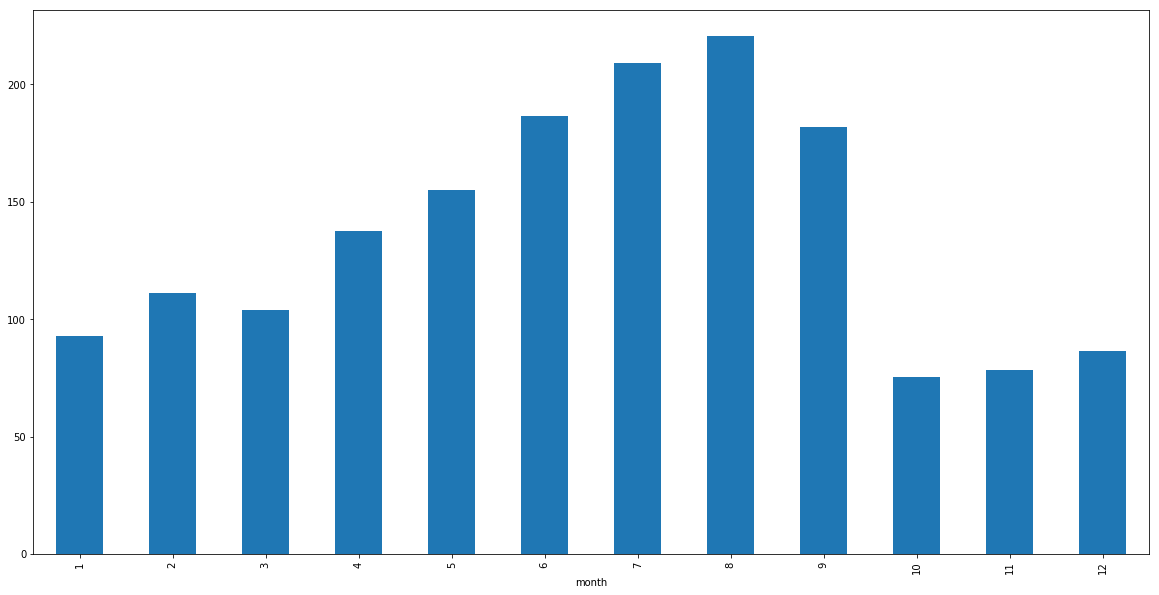

In [137]:
train.groupby('month').Count.mean().plot.bar()

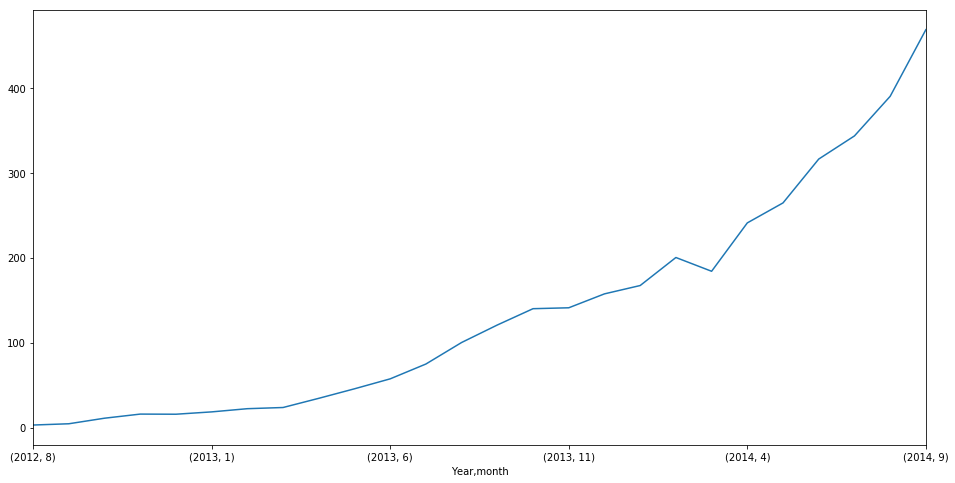

In [138]:
plt.figure(figsize=(16,8))
train.groupby(['Year', 'month']).Count.mean().plot()

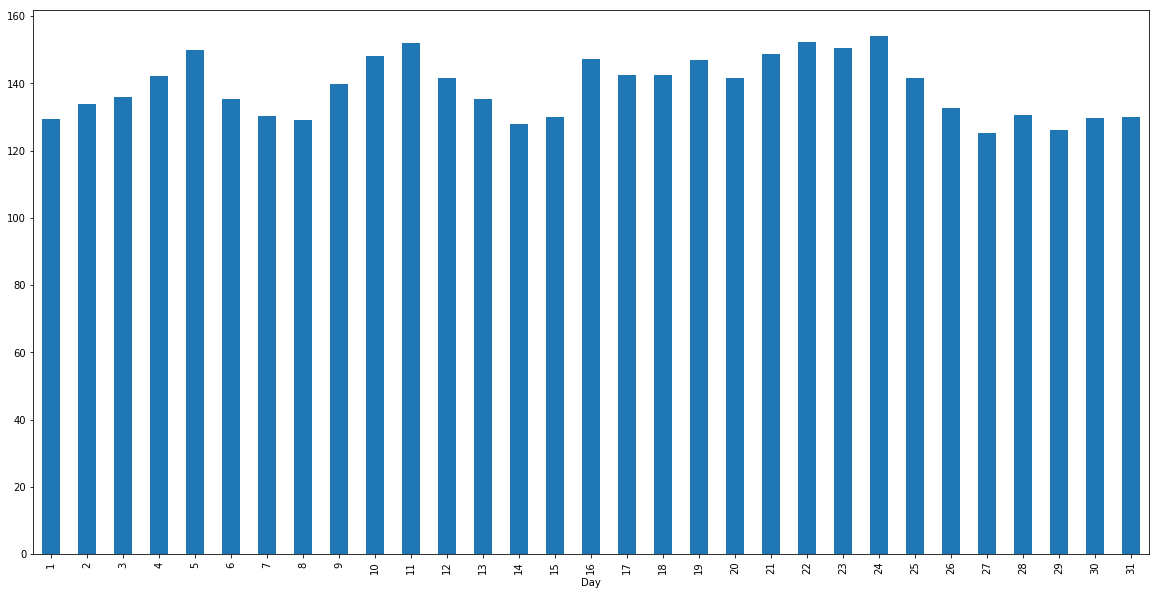

In [139]:
train.groupby('Day').Count.mean().plot.bar()

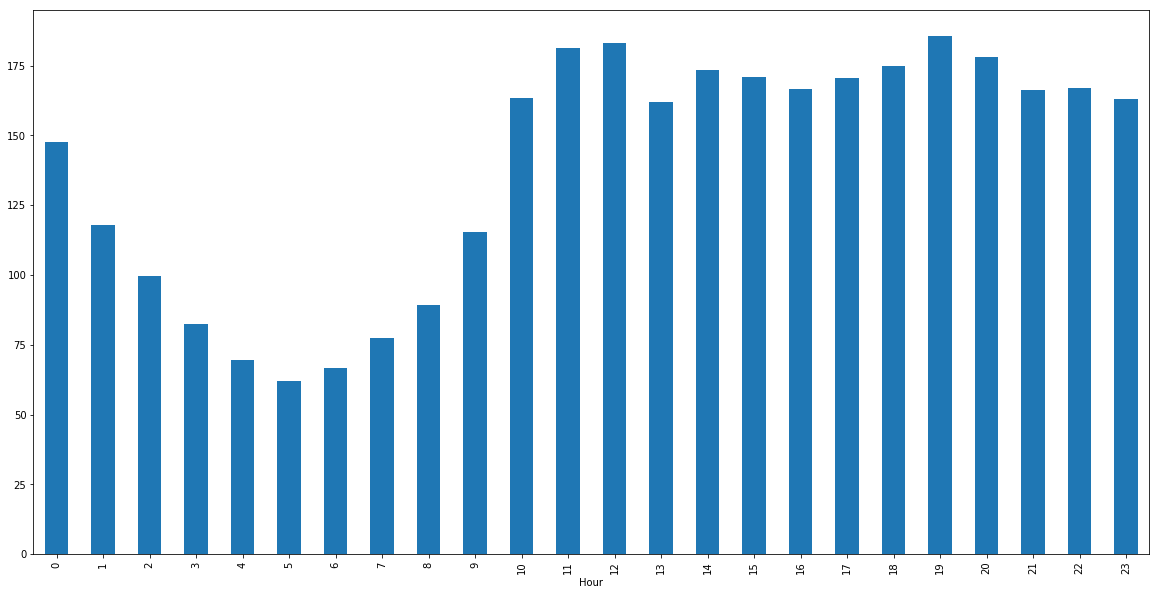

In [140]:
train.groupby('Hour').Count.mean().plot.bar()

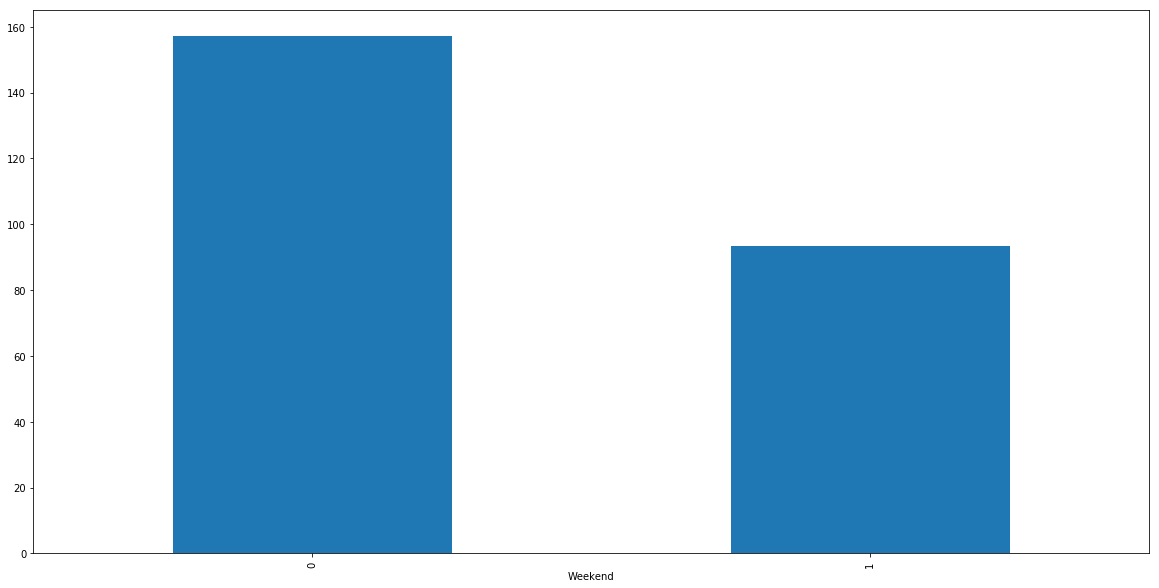

In [141]:
train.groupby('Weekend').Count.mean().plot.bar()

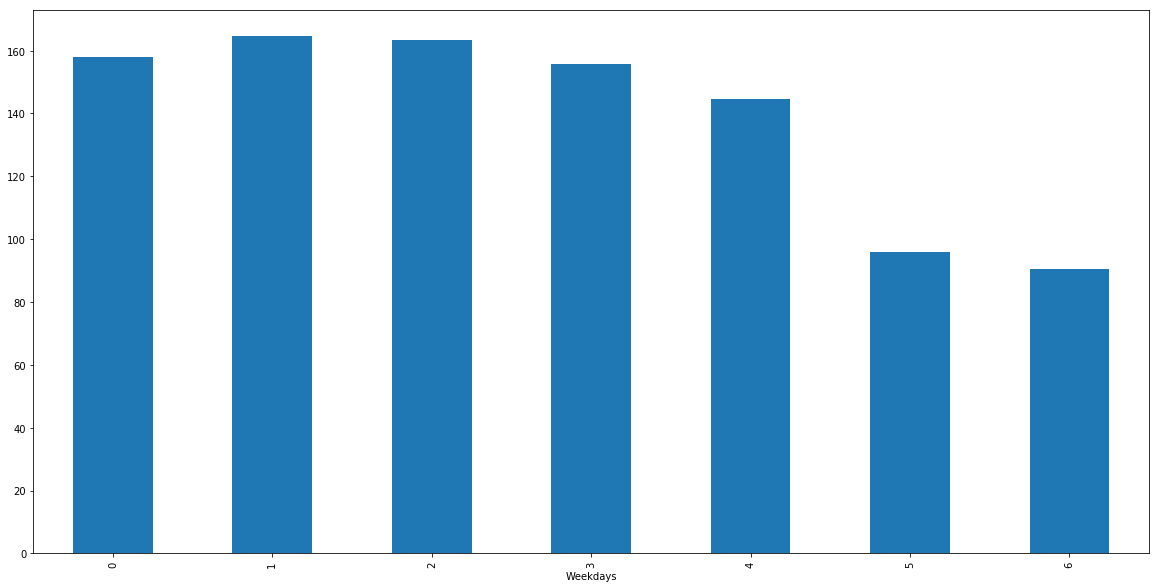

In [142]:
train.groupby('Weekdays').Count.mean().plot.bar()

In [0]:
# resampling ts into hourly, daily, weekly and monthly ts
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

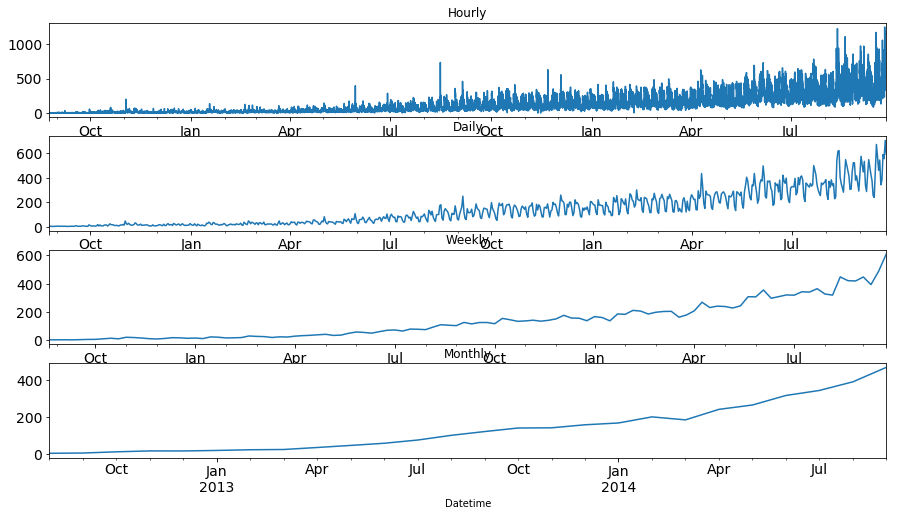

In [144]:
# Plot all the resampled ts
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='Monthly', fontsize=14, ax=axs[3])

In [148]:
# use daily data
train = train.resample('D').mean()
test.index = test['Datetime']

KeyError: ignored

In [147]:
test.drop('ID', 1, inplace=True)
test = test.resample('D').mean()

KeyError: ignored

In [0]:
print(train.head())
print(test.head())

In [0]:
train_part = train.loc['2012-08-25':'2014-06-24']
validate_part = train.loc['2014-06-25':'2014-09-25']
print(train_part.head())
print(validate_part.head())

In [0]:
dd=np.asarray(train_part.Count)
y_hat=validate_part.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train_part.index, train_part.Count, label='Train')
plt.plot(validate_part.index, validate_part.Count, label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [0]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

In [149]:
rmse = sqrt(mean_squared_error(validate_part.Count, y_hat.naive))
rmse

111.79050467496724

In [150]:
# Moving average of last 10 days
y_hat_ma = validate_part.copy()
y_hat_ma['MA_10_FC'] = train_part.Count.rolling(10).mean().iloc[-1]
y_hat['MA_10_FC']=y_hat_ma['MA_10_FC']
y_hat_ma.head()

,Count,Year,month,Day,Hour,Weekdays,Weekend,MA_10_FC
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,313.033333
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,313.033333
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,313.033333
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,313.033333
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,313.033333


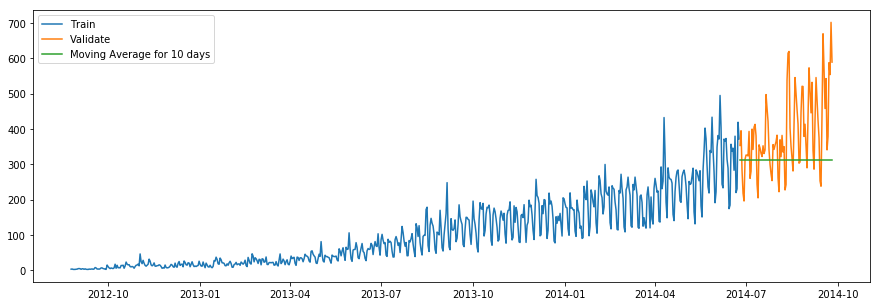

In [151]:
# Plotting the forecast
plt.figure(figsize=(15,5))
plt.plot(train_part.Count, label='Train')
plt.plot(validate_part.Count, label='Validate')
plt.plot(y_hat_ma.MA_10_FC, label='Moving Average for 10 days')
plt.legend(loc='best')
plt.show()

In [152]:
# Capturing RMSE
rmse=sqrt(mean_squared_error(validate_part.Count, y_hat_ma.MA_10_FC))
rmse

134.23733308950264

In [153]:
# Forecast using Simple Exponential Moving Average
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_ses=validate_part.copy()
model = SimpleExpSmoothing(np.asarray(train_part.Count)).fit(smoothing_level=0.6,optimized=False)
y_hat_ses['SES'] = model.forecast(len(validate_part))
y_hat['SES'] = y_hat_ses['SES']
y_hat_ses.head()

,Count,Year,month,Day,Hour,Weekdays,Weekend,SES
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,363.522492
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,363.522492
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,363.522492
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,363.522492
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,363.522492


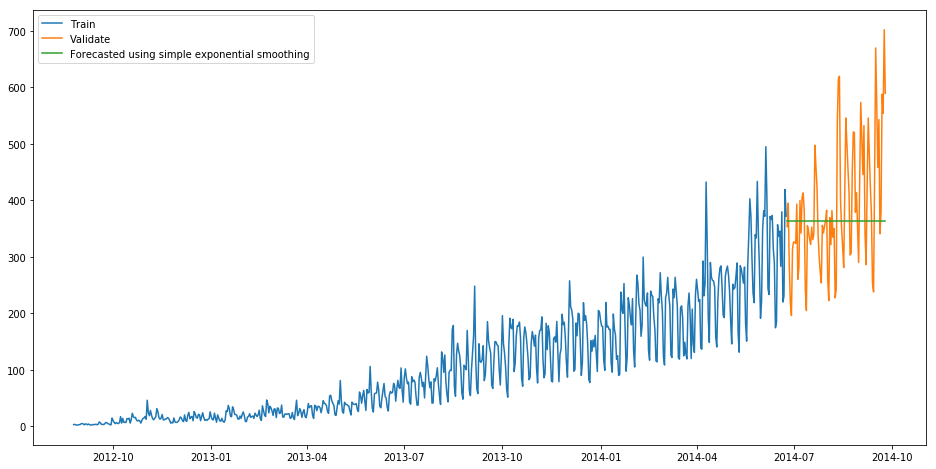

In [154]:
# Plotting SES
plt.figure(figsize=(16,8))
plt.plot(train_part.Count, label = 'Train')
plt.plot(validate_part.Count, label = 'Validate')
plt.plot(y_hat_ses['SES'], label='Forecasted using simple exponential smoothing')
plt.legend(loc='best')
plt.show()

In [155]:
rmse = sqrt(mean_squared_error(validate_part.Count, y_hat_ses.SES))
rmse

113.43708111884514

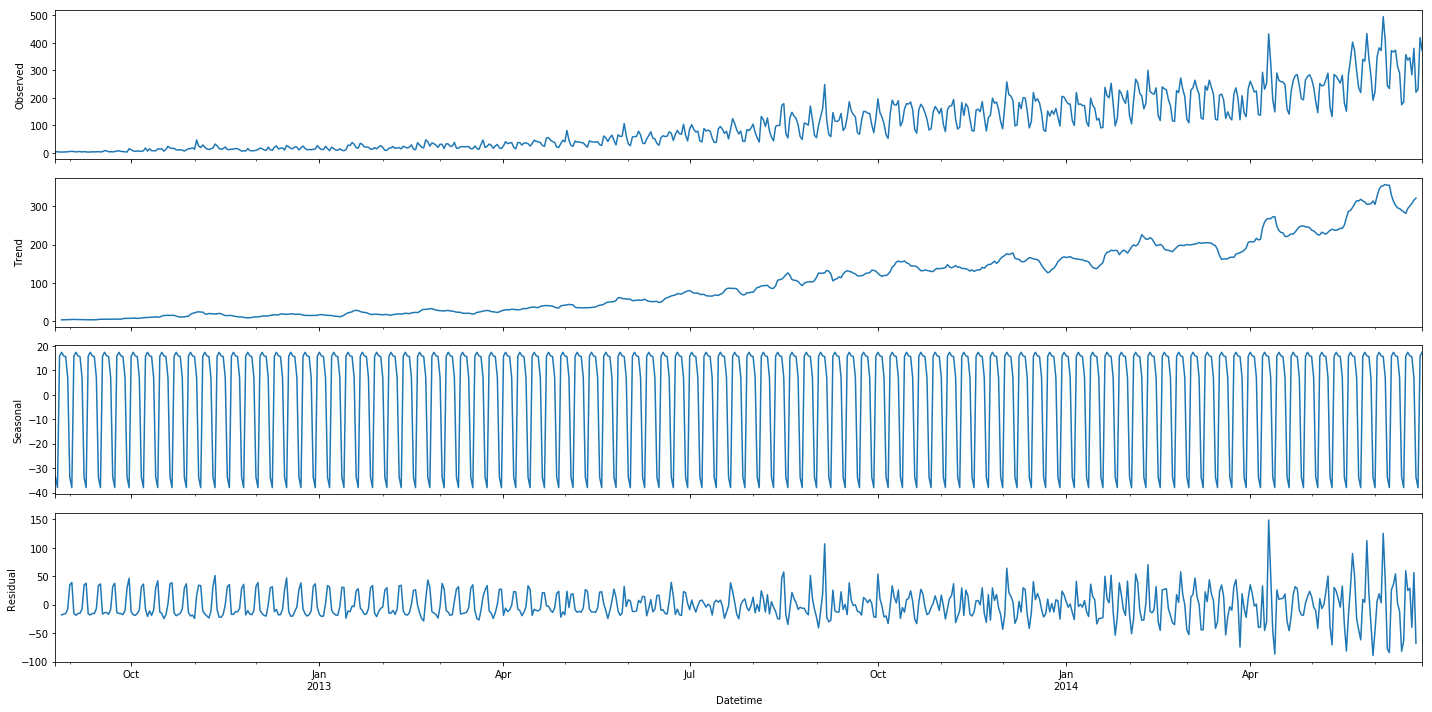

(2.9863509590138557,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '10%': -2.5688512291811225,
  '5%': -2.8654483492874236},
 7212.068059584323)

In [156]:
# Visualize Seasonal part
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train_part.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()
result

In [157]:
y_hat_holt = validate_part.copy()
model = Holt(np.asarray(train_part.Count)).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_holt['holt_linear'] = model.forecast(len(validate_part))
y_hat['holt_linear'] = y_hat_holt['holt_linear']
y_hat_holt.head()

,Count,Year,month,Day,Hour,Weekdays,Weekend,holt_linear
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,334.650767
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,337.159011
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,339.667256
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,342.175500
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,344.683745


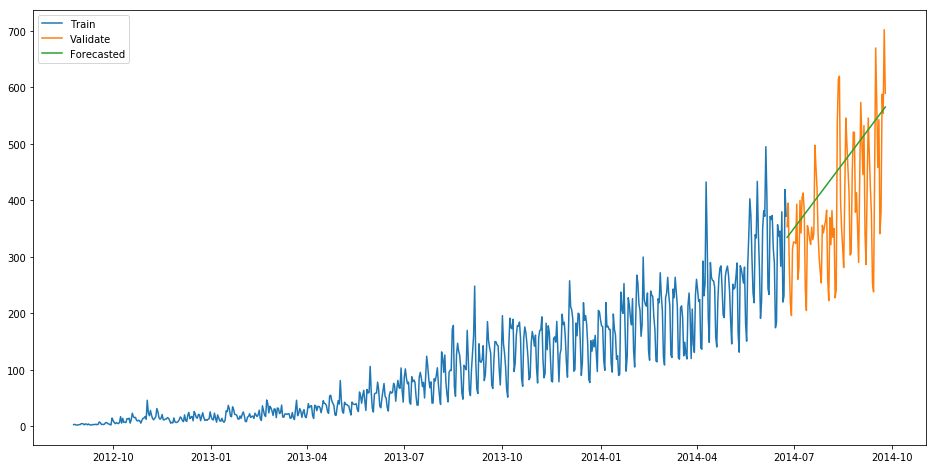

(2.9863509590138557,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '10%': -2.5688512291811225,
  '5%': -2.8654483492874236},
 7212.068059584323)

In [158]:
# Plot forecast
plt.figure(figsize=(16,8))
plt.plot(train_part.Count, label='Train')
plt.plot(validate_part.Count, label='Validate')
plt.plot(y_hat_holt.holt_linear, label='Forecasted')
plt.legend(loc='best')
plt.show()
result=sm.tsa.stattools.adfuller(train.Count)
result

In [159]:
rmse = sqrt(mean_squared_error(validate_part.Count, y_hat_holt.holt_linear))
rmse

112.94278345314041

In [160]:
# Holt's Winter model considers all seasonality, level and trend
y_hat_st = validate_part.copy()
model = ExponentialSmoothing(np.asarray(train_part.Count), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_st['st'] = model.forecast(len(validate_part))
y_hat['st'] = y_hat_st['st']
y_hat_st.head()

,Count,Year,month,Day,Hour,Weekdays,Weekend,st
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,387.359995
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,369.135921
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,355.563302
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,247.088754
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,246.192644


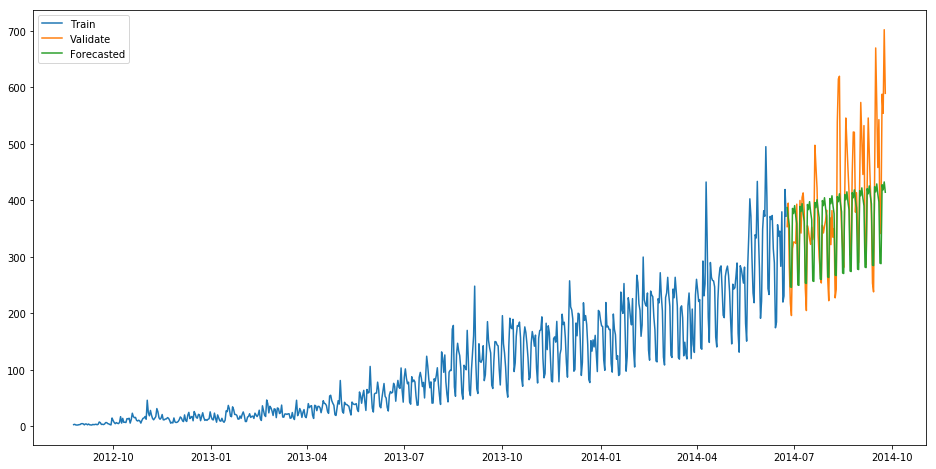

In [161]:
# Plot forecast
plt.figure(figsize=(16,8))
plt.plot(train_part.Count, label='Train')
plt.plot(validate_part.Count, label='Validate')
plt.plot(y_hat_st.st, label='Forecasted')
plt.legend(loc='best')
plt.show()

In [162]:
rmse = sqrt(mean_squared_error(validate_part.Count, y_hat_st.st))
rmse

82.37571191747172

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
def check_stationarity(ts):
  #   Determining rolling statistics
  rolmean = ts.rolling(window=24).mean()
  rolstd = ts.rolling(window=24).std()
  #  Plotting rolling statistics
  orig = plt.plot(ts, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Variance')
  plt.legend(loc='best')
  plt.title("Rolling statistics of the time series")
  plt.show()
  
  print("Result of Dickey Fuller test: ")
  dftest = adfuller(ts, autolag='AIC')
#   print(dftest)
  dfoutput = pd.Series(dftest[0:4], index = ["test statistics", "p-value", "# of lags used", "No. of Observations"])
  
  for key, value in dftest[4].items():
    dfoutput["Critical value (%s)" %key] = value 
  print(dfoutput) 

TypeError: ignored

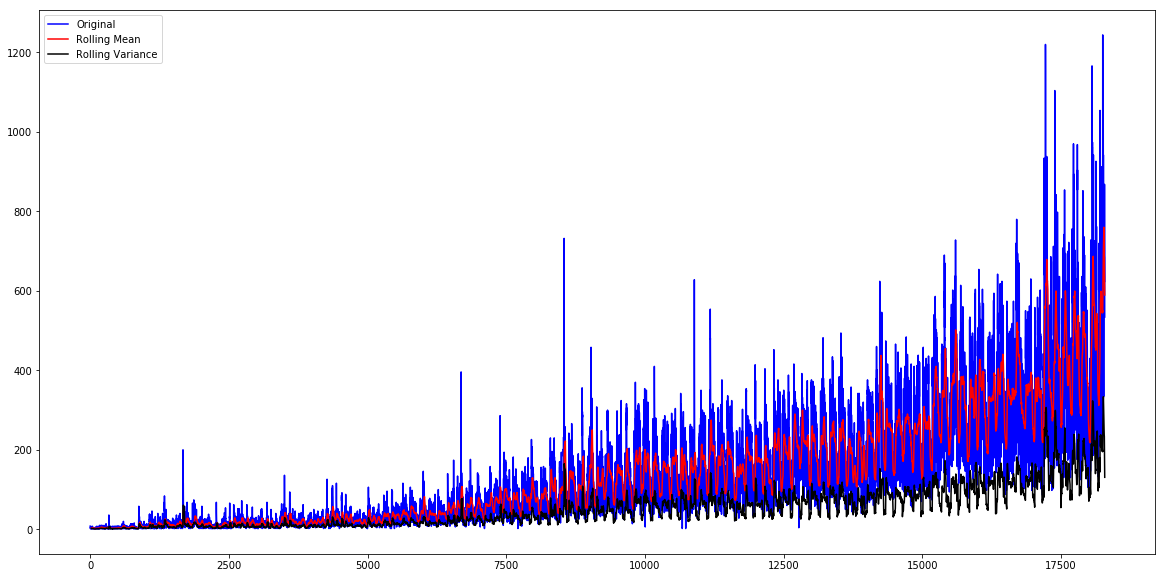

In [164]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20,10
check_stationarity(train_1.Count)

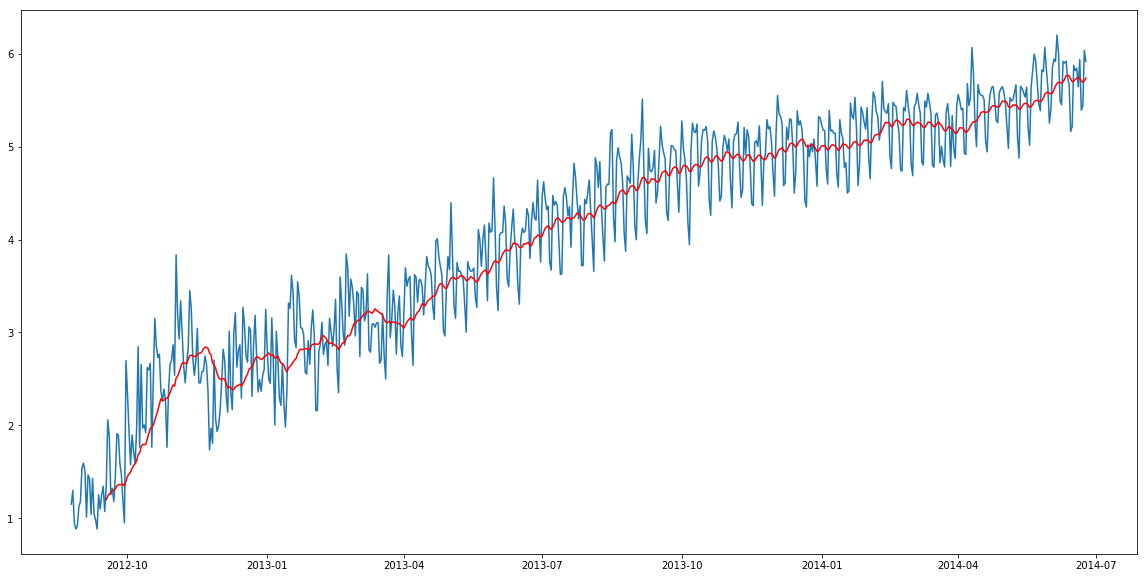

In [165]:
# Removal of trends using log and rolling mean
train_log = np.log(train_part.Count)
valid_log = np.log(validate_part.Count)

moving_avg = train_log.rolling(24).mean()

plt.plot(train_log)
plt.plot(moving_avg, color='red')
plt.show()

TypeError: ignored

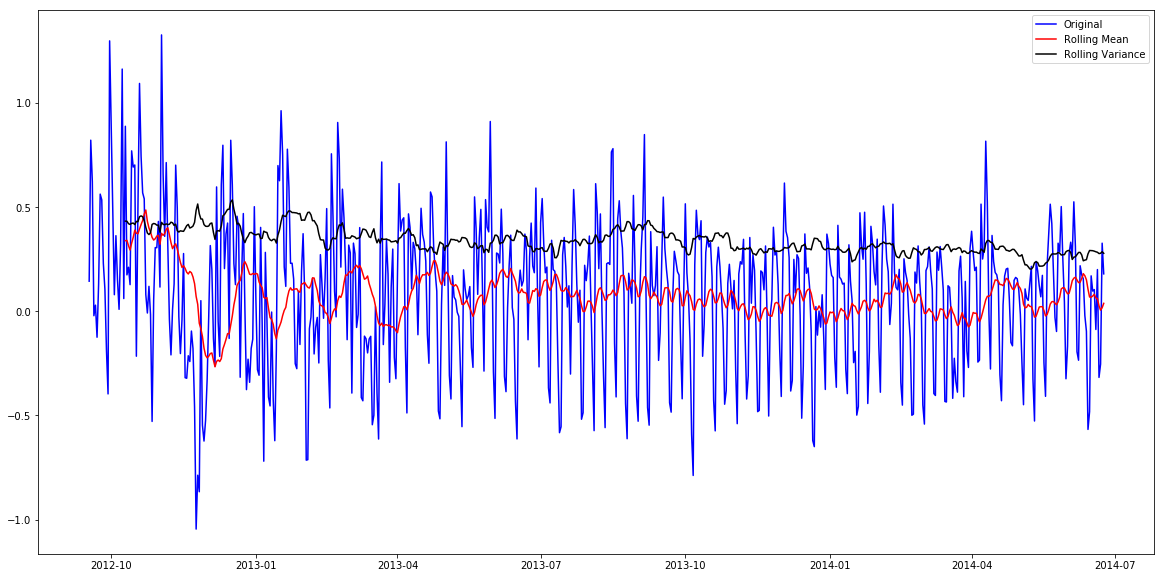

In [166]:
# Removing trend by differencing 
train_log_ma_diff = train_log - moving_avg
train_log_ma_diff.dropna(inplace=True)
check_stationarity(train_log_ma_diff)

TypeError: ignored

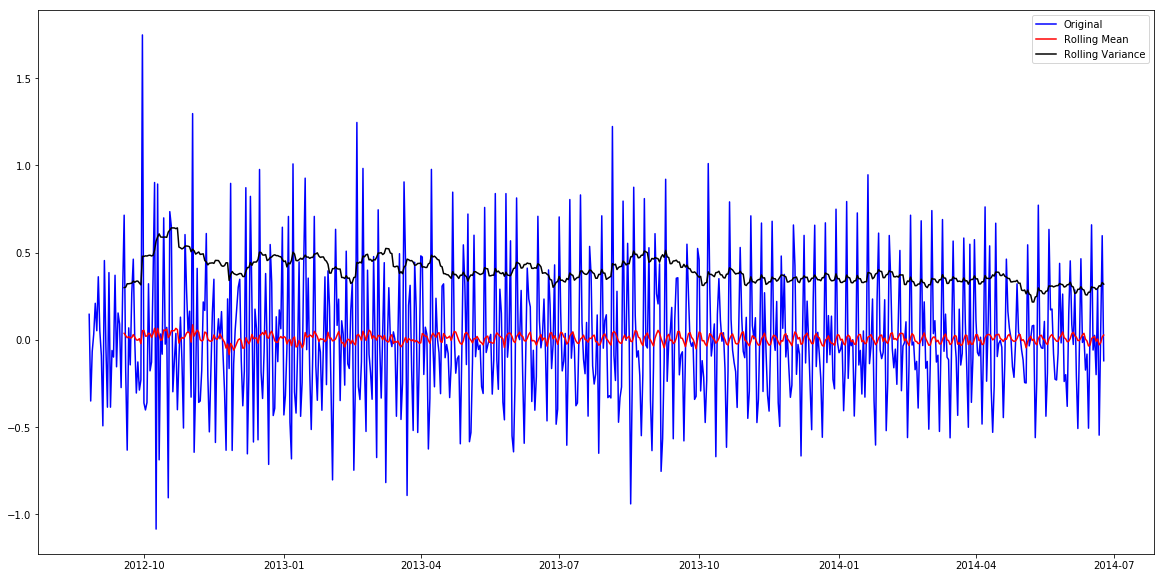

In [167]:
train_log_diff = train_log-train_log.shift(1)
train_log_diff.dropna(inplace=True)
check_stationarity(train_log_diff)

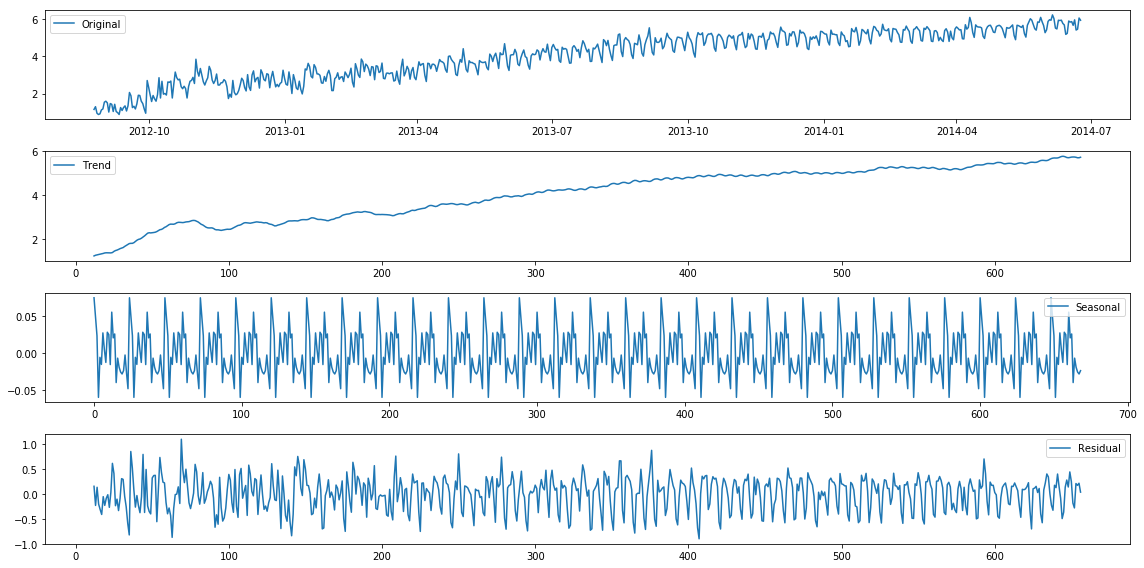

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompos = seasonal_decompose(pd.DataFrame(train_log).Count.values,freq=24)
trend=decompos.trend
season=decompos.seasonal
resid=decompos.resid

plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(train_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(season, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


TypeError: ignored

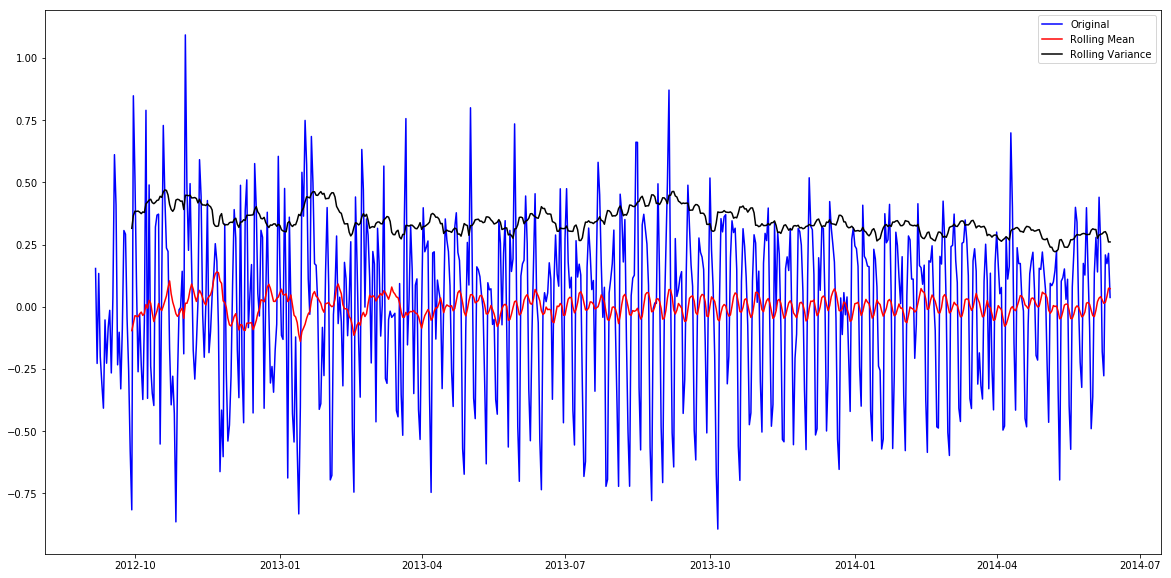

In [170]:
# check stationrity of the residual
# type(resid)
train_log_resid = pd.DataFrame(resid)
train_log_resid.set_index(train_log.index,inplace=True)
train_log_resid.dropna(inplace=True)
check_stationarity(train_log_resid[0])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


TypeError: ignored

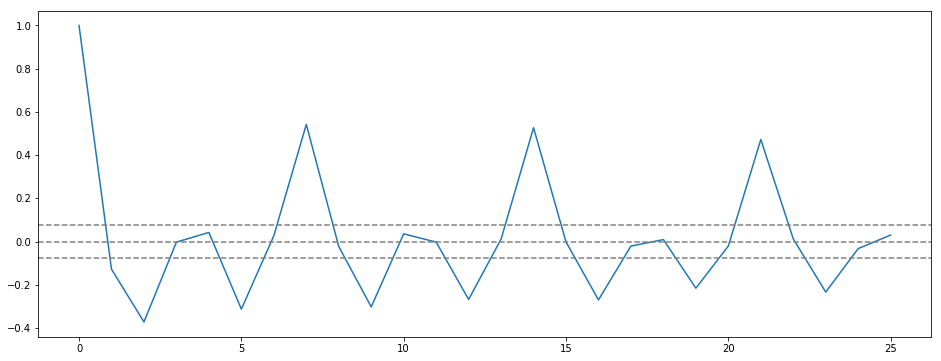

In [171]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff, nlags=25)
lag_pacf = pacf(train_log_diff, nlags=25, method='ols')
plt.figure(figsize=(16,6))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.figure(figsize=(16,6))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

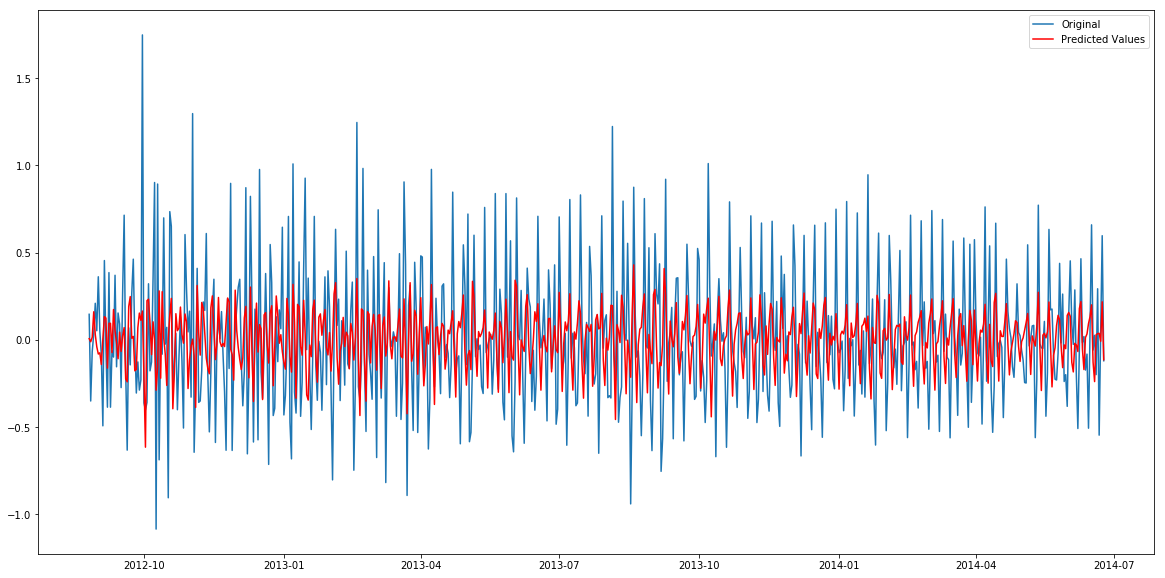

In [172]:
# AR model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order = (2,1,0))
result_AR = model.fit(disp=-1)
plt.plot(train_log_diff, label='Original')
plt.plot(result_AR.fittedvalues, color='red', label="Predicted Values")
plt.legend(loc='best')
plt.show()

In [183]:
AR_predict=result_AR.predict(start='2014-06-25', end='2014-09-25')
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(validate_part.shape[0])*np.log(validate_part.Count)[0], index=validate_part.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value=0)
AR_predict=np.exp(AR_predict1)
print(np.sqrt(mean_squared_error(AR_predict, validate_part['Count'])))


115.22837779739565


TypeError: ignored

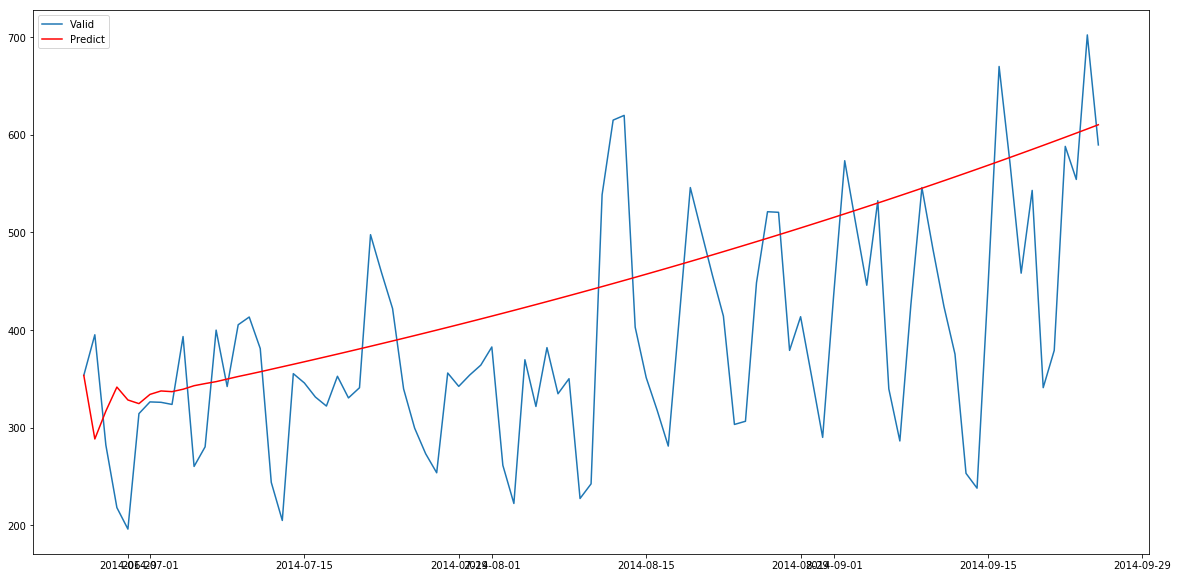

In [182]:

# plotting TS
plt.plot(validate_part['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(mean_squared_error(AR_predict, validate_part['Count']))/validate_part.shape[0])) 
plt.show()


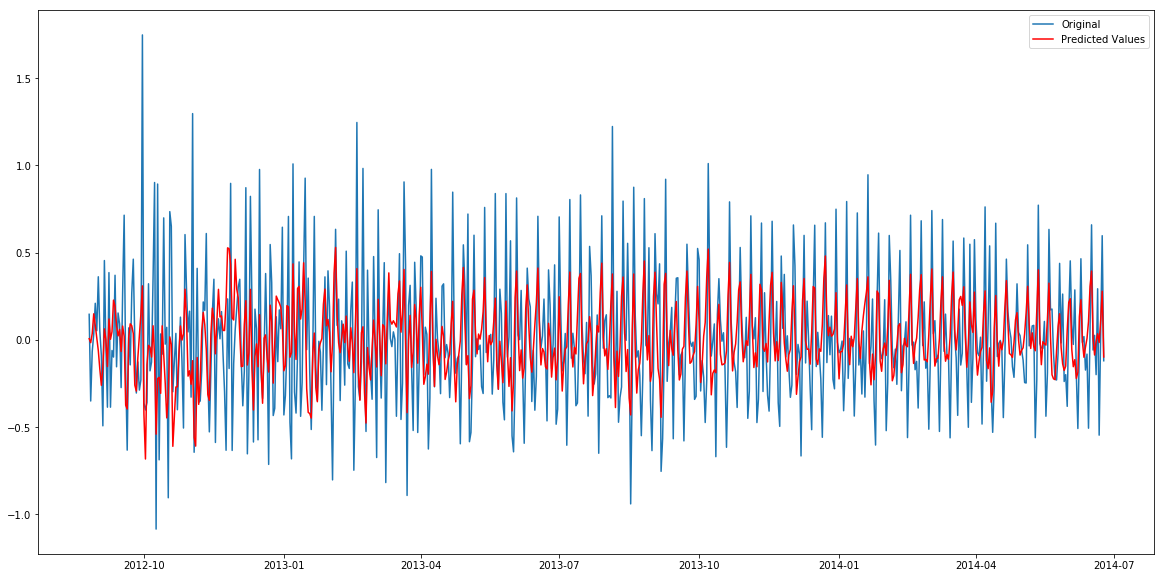

In [177]:

# Moving Average
model=ARIMA(train_log, order=(0,1,2))
result_MA=model.fit(disp=-1)
# result_MA.fittedvalues
plt.plot(train_log_diff, label='Original')
plt.plot(result_MA.fittedvalues, color='red', label='Predicted Values')
plt.legend(loc='best')
plt.show()

1.1499760074576701


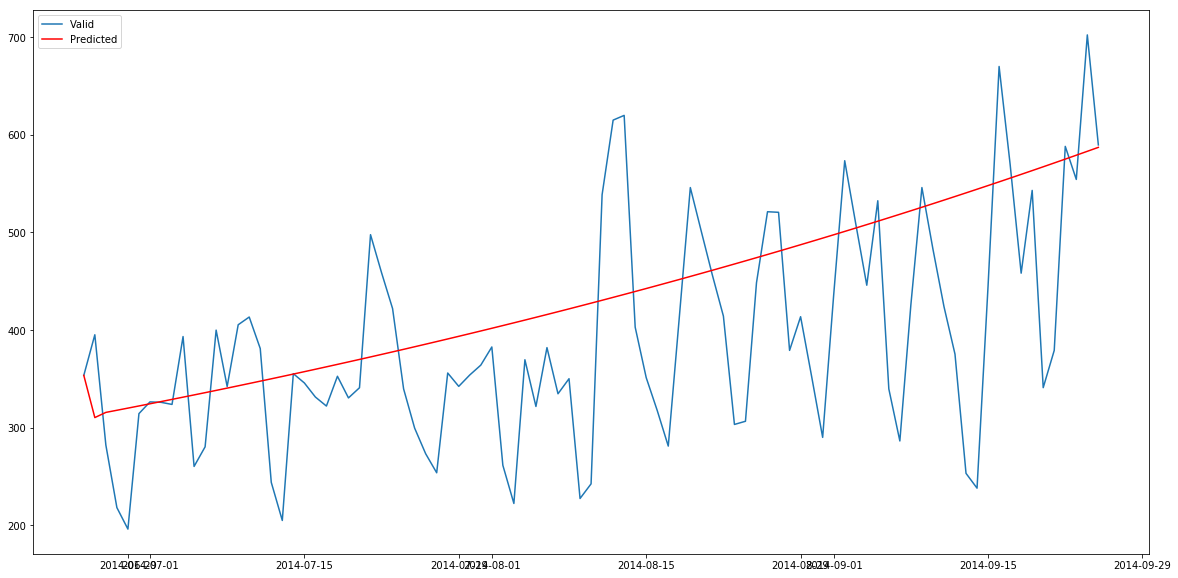

In [213]:
# Validation of MA
MA_predict = result_MA.predict(start='2014-06-25', end='2014-09-25')
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(validate_part.shape[0])*np.log(validate_part.Count)[0], index=validate_part.index)
MA_predict1=MA_predict1.add(MA_predict, fill_value=0)
MA_predict=np.exp(MA_predict1)
print(np.sqrt(mean_squared_error(validate_part.Count, MA_predict)))
      
# plt.figure(figsize=(30,8))
plt.plot(validate_part.Count, label='Valid')
plt.plot(MA_predict, color='red', label='Predicted')
plt.legend(loc='best')
plt.title=('RMSE: %0.4f'%(np.sqrt(mean_squared_error(validate_part.Count, MA_predict))/validate_part.shape[0]))
plt.show()

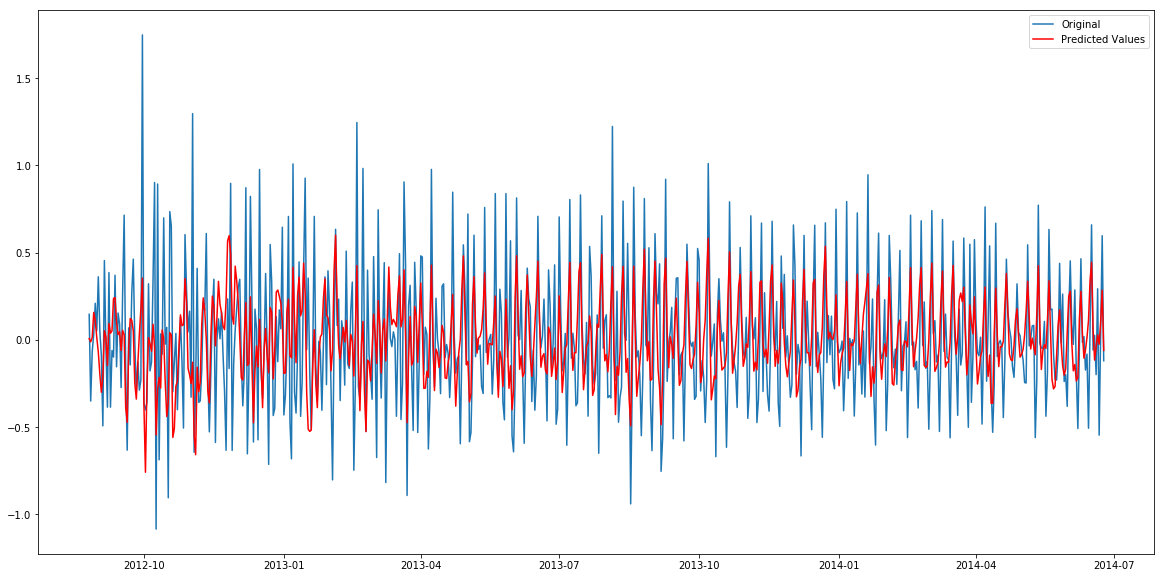

In [189]:
# Combined model of AR and MA
model=ARIMA(train_log, order=(2,1,2))
result_ARIMA = model.fit(disp=-1)
plt.plot(train_log_diff, label="Original")
plt.plot(result_ARIMA.fittedvalues, color='red',label="Predicted Values")
plt.legend(loc='best')
plt.show()


In [228]:
# Performance on validation set
ARIMA_predict = result_ARIMA.predict(start='2014-06-25', end='2014-09-25')

Count       0
Year        0
month       0
Day         0
Hour        0
Weekdays    0
Weekend     0
dtype: int64

In [0]:
# Function to compare the diffrence
def check_diff(AP, VP):
  AP = AP.cumsum().shift().fillna(0)
  AP1 = pd.Series(np.ones(VP.shape[0])*np.log(VP.Count)[0], index=VP.index)
  AP1 = AP1.add(AP, fill_value=0)
  AP = np.exp(AP1)
  print(sqrt(mean_squared_error(AP, VP.Count)))

  plt.plot(VP.Count, label='Original')
  plt.plot(AP, color='red', label='Predicted')
  plt.legend(loc='best')
  plt.show()
#   ARIMA_predict = ARIMA_predict.cumsum().shift().fillna(0)
#   predict_base=pd.Series(np.ones(original_set.shape[0])*np.log(original_set.Count)[0], index=original_set.index)
#   predict_log=predict_base.add(ARIMA_predict, fill_value=0)
#   predict=np.exp(predict_log)
#   print(np.sqrt(np.dot(predict, original_set['Count'])))#/original_set.shape[0])
  
#   plt.plot(original_set['Count'], label = "Original set")
#   plt.plot(predict, color = 'red', label = "Predict")
#   plt.legend(loc= 'best')
#   plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, original_set['Count']))/original_set.shape[0]))
#   plt.show()
  
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log) 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()  
  

103.86964482430656


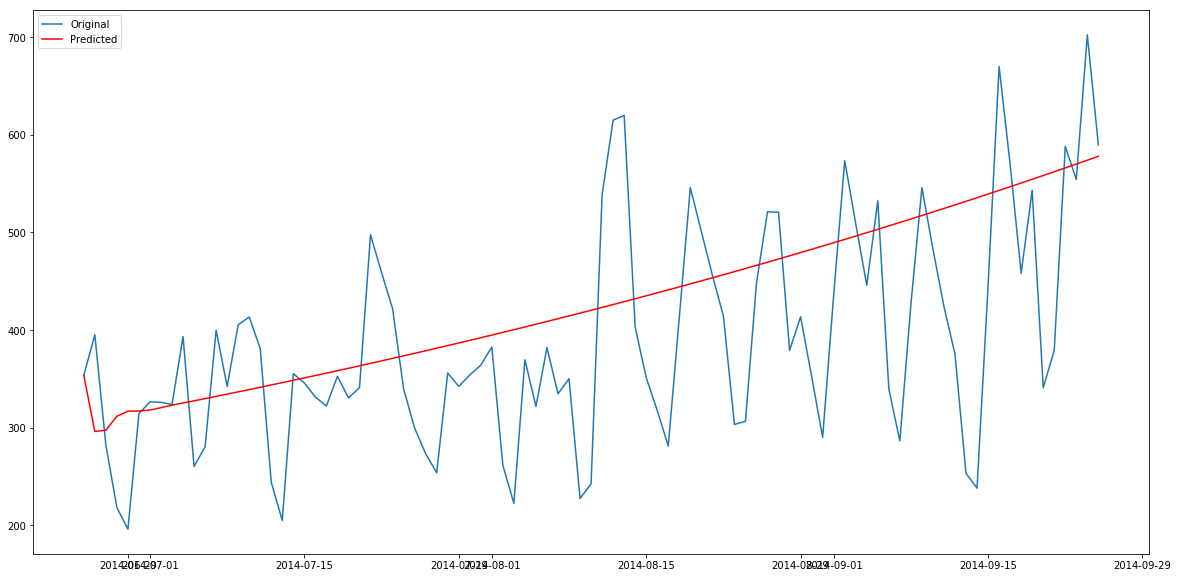

In [232]:
check_diff(ARIMA_predict, validate_part)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


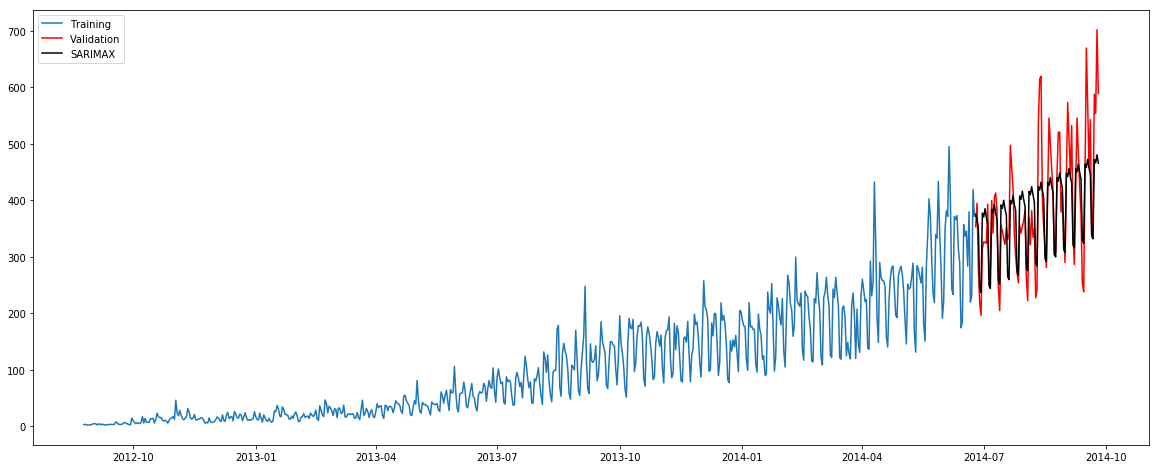

In [274]:
import statsmodels.api as sm
y_hat_SX = validate_part.copy() 
model = sm.tsa.statespace.SARIMAX(train_part.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_SX['SARIMAX'] = model.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 

y_hat['SARIMAX']=y_hat_SX['SARIMAX']
y_hat_SX['SARIMAX'].head()

plt.figure(figsize=(20,8))
plt.plot(train_part['Count'], label='Training')
plt.plot(validate_part['Count'], color='red', label='Validation')
plt.plot(y_hat_SX['SARIMAX'], color='black', label='SARIMAX')
plt.legend(loc='best')
plt.show()

In [265]:
y_hat_avg = validate_part.copy() 
fit1 = sm.tsa.statespace.SARIMAX(train_part.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
y_hat_avg['SARIMA'].head()

plt.figure(figsize=(16,8)) 
plt.plot(train_part['Count'], label='Train') 
plt.plot(validate_part['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Datetime
2014-06-25    375.564794
2014-06-26    364.661547
2014-06-27    351.399586
2014-06-28    243.319087
2014-06-29    237.076159
Freq: D, Name: SARIMA, dtype: float64

In [266]:
y_hat_avg = validate_part.copy() 
fit1 = sm.tsa.statespace.SARIMAX(train_part.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
y_hat_avg['SARIMA'].head()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Datetime
2014-06-25    375.564794
2014-06-26    364.661547
2014-06-27    351.399586
2014-06-28    243.319087
2014-06-29    237.076159
Freq: D, Name: SARIMA, dtype: float64